### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.12.0'

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()

Metal device set to: Apple M1


### Convolution Layer

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Max Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Saving Checkpoints

In [13]:
import os
checkpoint_path = "Checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


### Training the CNN on the Training set and evaluating it on the Test set 

In [14]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25,callbacks=[cp_callback])

Epoch 1/25


2023-05-27 12:23:49.346487: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


250/250 [==============================] - ETA: 0s - loss: 0.6800 - accuracy: 0.5583
Epoch 1: saving model to Checkpoints/cp.ckpt
250/250 [==============================] - 11s 43ms/step - loss: 0.6800 - accuracy: 0.5583 - val_loss: 0.6161 - val_accuracy: 0.6590
Epoch 2/25
249/250 [============================>.] - ETA: 0s - loss: 0.5997 - accuracy: 0.6835
Epoch 2: saving model to Checkpoints/cp.ckpt
250/250 [==============================] - 10s 42ms/step - loss: 0.5996 - accuracy: 0.6835 - val_loss: 0.5636 - val_accuracy: 0.7135
Epoch 3/25
250/250 [==============================] - ETA: 0s - loss: 0.5571 - accuracy: 0.7140
Epoch 3: saving model to Checkpoints/cp.ckpt
250/250 [==============================] - 11s 42ms/step - loss: 0.5571 - accuracy: 0.7140 - val_loss: 0.5308 - val_accuracy: 0.7410
Epoch 4/25
249/250 [============================>.] - ETA: 0s - loss: 0.5324 - accuracy: 0.7303
Epoch 4: saving model to Checkpoints/cp.ckpt
250/250 [==============================] - 10s 4

## Making prediction

In [15]:
import numpy as np
from keras.preprocessing import image
from matplotlib import pyplot as plt

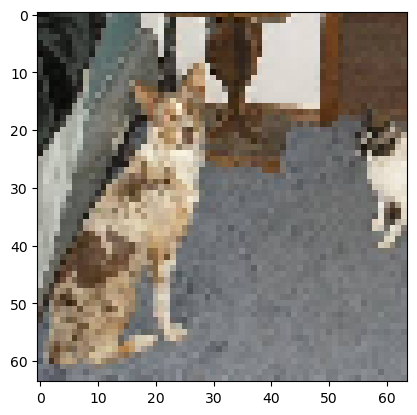

In [19]:
Path = 'dataset/single_prediction/cat_or_dog_1.jpg' #Image path
test_image = tf.keras.utils.load_img(Path, target_size = (64, 64))
plt.imshow(test_image)

In [20]:

test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 17ms/step


In [21]:
print(prediction)

dog
